<div align ="right">Thomas Jefferson University **COMP 102**: Intro to Scientific Computing</div>

# Plotting a line graph with Matplotlib

**What are line-plots used for?**

Line graphs are used to track numberical changes over a period of time for one or more groups. If there are multiple groups, each can be differentiated by the use of different color lines or different shape of time-points.

Here's a quick tutorial to get you started working with matplotlib's line-ploting functions.



As always, let's import pandas and matplotlib.pyplot 
```
import pandas as pd
from matplotlib import pyplot as plt 
```

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from numpy import *

Once again, save the `Heartrate_Data.xlsx` file as a `.csv`. **Make sure the name of the file matches the one written below in code.**

In [2]:
sample_data = pd.read_csv('data/Heartrate_Data.csv')

Again, we can take a quick look at the data that we just imported by typing in out in python. Let's just check to make sure that the csv file has been imported.

In [3]:
sample_data

,Minutes,Heartrate
0,0,58
1,1,56
2,2,54
3,3,54
4,4,53
5,5,57
6,6,62
7,7,57
8,8,56
9,9,55


We can retrieve the type of data by using the `type()` function. Let's make sure that the data is stored as a DataFrame

In [4]:
type(sample_data)

pandas.core.frame.DataFrame

In [5]:
# %matplotlib inline # Not sure if this is needed anymore....

Let's plot the basic graph using the `plt.plot` function and using `(seconds, Heartrate)` as the `(x, y)` axis

Let's store the plot -> `Heartbeat_Plot`

We use `plt.show()` to show us the plot...basically a `print()` function... but for graphs!

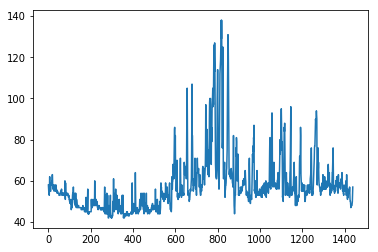

In [6]:
Heartbeat_Plot = plt.plot(sample_data.Minutes, sample_data.Heartrate)
plt.show()

Great!

Now let's label these graphs axis as all graphs should be. Remember to label the axes with the measurement and the units in parentheses.

We can also manipulate the `fontsize` and `color` of the text (and the graph itself) with \*\*kwarg's. Color, alone, can be changed using many different formats: `Greyscale, Names, Hex color, RGB, single-letter colors`



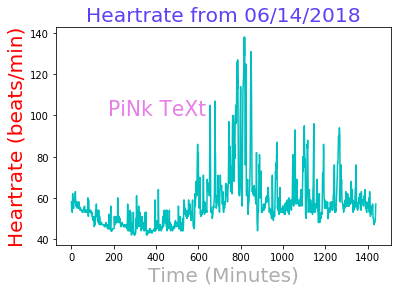

In [7]:
plt.xlabel('Time (Minutes)', fontsize = 20.0, color = '0.68') #Greyscale
plt.ylabel('Heartrate (beats/min)', fontsize = 20.1, color = 'red') #Name
plt.title('Heartrate from 06/14/2018', fontsize = 20.2, color = '#5c42f4') #Hexcolor
plt.text(175, 100, 'PiNk TeXt', fontsize = 20.3, color = (0.9,0.5,0.9)) #RGB

plt.plot(sample_data.Minutes, sample_data.Heartrate, color = 'c') #Built-in single-letter colors, c = cyan
#plt.show()

Keep in mind that there is no specific order of the 'traits' (\*\*kwargs) of the text or graph that must be followed. However, some traits must be in a particular order, such as the text itself (`'Time (Minutes)'` must come before `fontsize` or `color` or other traits)

The coordinates given for `plt.text` is the BOTTOM LEFT corner of the textbox that will be created

There are many things that can be done to this line-plot, but we're just going to go over some simple commands. The full documentation for using line-plots can be found here: 

https://matplotlib.org/users/pyplot_tutorial.html

Let's just take a look at seconds 0-500 by using the `plt.axis` function. we add the `[0:500]` to sample_data to limit what matplotlib uses to make the new graph.

`plt.axis` can be used to "zoom" in or out. The parameters for this function are as follows:

`plt.axis([left x axis bound, right x axis bound, bottom y axis bound, top y axis bound])`

We'll leave some extra space (20) on the left and right of the graph so it doesn't look too clustered

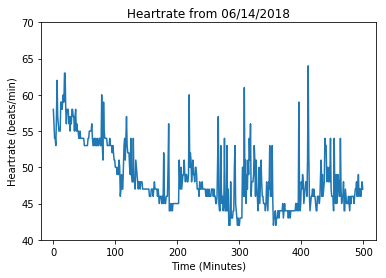

In [8]:
plt.axis([0-20, 500+20, 40, 70])

plt.xlabel('Time (Minutes)')
plt.ylabel('Heartrate (beats/min)')
plt.title('Heartrate from 06/14/2018')
plt.plot(sample_data.Minutes[0:500], sample_data.Heartrate[0:500])
#plt.show()

Let's write a function that allows us to find the local max and min from seconds 0-500

In [9]:
local_max = 0

for i in range (0,500):
    if sample_data.Heartrate[i] > local_max:
        local_max = sample_data.Heartrate[i]
        local_max_index = i
print (local_max, ",", local_max_index)


local_min= 10000

for i in range (0,500):
    if sample_data.Heartrate[i] < local_min:
        local_min = sample_data.Heartrate[i]
        local_min_index = i
            #return local_min_index
        
print (local_min, ",", local_min_index)


64 , 411
42 , 283


Hmm, it looks like there are multiple local mins...let's write another function to find all of them

In [10]:
local_min_indexs = []

for i in range (0,500):
    if sample_data.Heartrate[i] == local_min:
        local_min_indexs.append(i)
        
print(local_min_indexs)

[283, 284, 285, 297, 299, 300, 355, 359]


We can add text to this graph by using the `plt.text()` function.

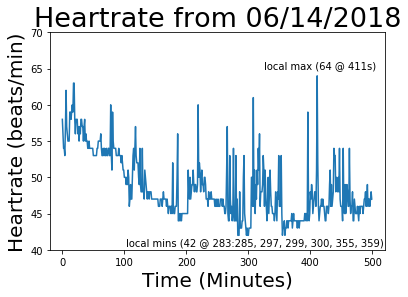

In [11]:
plt.text(326 , 65, 'local max (64 @ 411s)', fontsize = 10)
# (326,65) has no significant meaning, only using to center and raise the text on MAX. Real MAX @ (411, 64)

plt.text(103, 40.61, 'local mins (42 @ 283:285, 297, 299, 300, 355, 359)', fontsize = 10)
# (103, 40.61) has no significant meaning, only using to center and lower the text on MIN. Real MAX @ (multi, 64)


plt.axis([-20, 520, 40, 70])
plt.xlabel('Time (Minutes)', fontsize = 20)
plt.ylabel('Heartrate (beats/min)', fontsize = 20)
plt.title('Heartrate from 06/14/2018', fontsize = 27)
plt.plot(sample_data.Minutes[0:500], sample_data.Heartrate[0:500])
plt.show()

That looks great! You can save this graph by dragging it onto your desktop or right-clicking and selecting "save as"

Note: USIUNG PLOT.SHOW() GIVES CLEAN OUTPUT. NO TEXT, JUST A GRAPH.

notes:




sample_data.Heartrate[6]

len(sample_data.Seconds)

local_max = 0

for i in range (0,500):
    if sample_data.Heartrate[i] > local_max:
        local_max = sample_data.Heartrate[i]
print (i)